# ***机器学习策略（上）***

# 1. ML策略

① 当我们最初得到一个深度神经网络模型时，我们可能希望从很多方面来对它进行优化，例如：

 - Collect more data

 - Collect more diverse training set

 - Train algorithm longer with gradient descent

 - Try Adam instead of gradient descent

 - Try bigger network

 - Try smaller network

 - Try dropout

 - Add L2 regularization

 - Network architecture: Activation functions, #hidden units…
 
② 可选择的方法很多，也很复杂、繁琐。

③ 盲目选择、尝试不仅耗费时间而且可能收效甚微。

④ 因此，使用快速、有效的策略来优化机器学习模型是非常必要的。

# 2. 正交化

① 机器学习中有许多参数、超参数需要调试。

② 通过每次只调试一个参数，保持其它参数不变，而得到的模型某一性能改变是一种最常用的调参策略，我们称之为正交化方法（Orthogonalization）。

① Orthogonalization的核心在于每次调试一个参数只会影响模型的某一个性能。

② 例如老式电视机旋钮，每个旋钮就对应一个功能，调整旋钮会调整对应的功能，而不会影响其它功能。

③ 也就是说彼此旋钮之间是互不影响的，是正交的，这也是Orthogonalization名称的由来。

④ 这种方法能够让我们更快更有效地进行机器学习模型的调试和优化。

① 对应到机器学习监督式学习模型中，可以大致分成四个独立的“功能”，每个“功能”对应一些可调节的唯一的旋钮。四个“功能”如下：

 - Fit training set well on cost function

 - Fit dev set well on cost function

 - Fit test set well on cost function

 - Performs well in real world
 
② 其中，第一条优化训练集可以通过使用更复杂NN，使用Adam等优化算法来实现；第二条优化验证集可以通过正则化，采用更多训练样本来实现；第三条优化测试集可以通过使用更多的验证集样本来实现；第四条提升实际应用模型可以通过更换验证集，使用新的cost function来实现。

③ 概括来说，每一种“功能”对应不同的调节方法。而这些调节方法（旋钮）只会对应一个“功能”，是正交的。

① 顺便提一下，early stopping在模型功能调试中并不推荐使用。

② 因为early stopping在提升验证集性能的同时降低了训练集的性能。也就是说early stopping同时影响两个“功能”，不具有独立性、正交性。

# 3. 单值评估指标

① 构建、优化机器学习模型时，单值评价指标非常必要。

② 有了量化的单值评价指标后，我们就能根据这一指标比较不同超参数对应的模型的优劣，从而选择最优的那个模型。

① 举个例子，比如有A和B两个模型，它们的准确率（Precision）和召回率（Recall）分别如下：

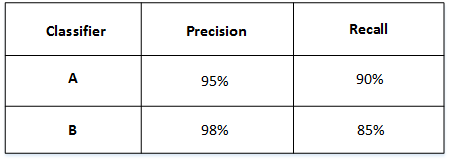

② 如果只看Precision的话，B模型更好。如果只看Recall的话，A模型更好。

① 实际应用中，我们通常使用单值评价指标F1 Score来评价模型的好坏。

② F1 Score综合了Precision和Recall的大小，计算方法如下：

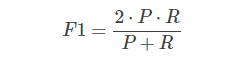

③ 然后得到了A和B模型各自的F1 Score：

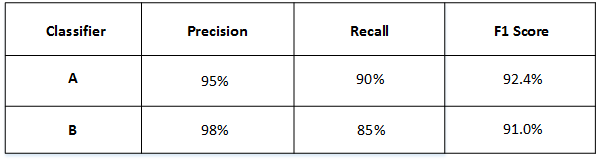

④ 从F1 Score来看，A模型比B模型更好一些。

⑤ 通过引入单值评价指标F1 Score，很方便对不同模型进行比较。

⑥ 除了F1 Score之外，我们还可以使用平均值作为单值评价指标来对模型进行评估。

⑦ 如下图所示，A, B, C, D, E, F六个模型对不同国家样本的错误率不同，可以计算其平均性能，然后选择平均错误率最小的那个模型（C模型）。

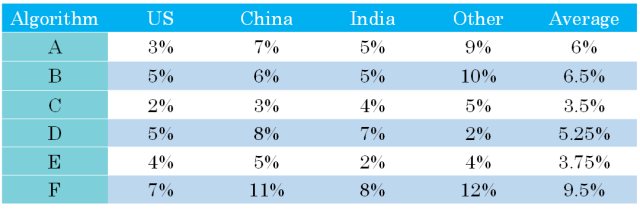

# 4. 优化指标和满意指标

① 有时候，要把所有的性能指标都综合在一起，构成单值评价指标是比较困难的。

② 解决办法是，我们可以把某些性能作为优化指标（Optimizing metic），寻求最优化值；而某些性能作为满意指标（Satisficing metic），只要满足阈值就行了。

① 举个猫类识别的例子，有A，B，C三个模型，各个模型的Accuracy和Running time如下表中所示：

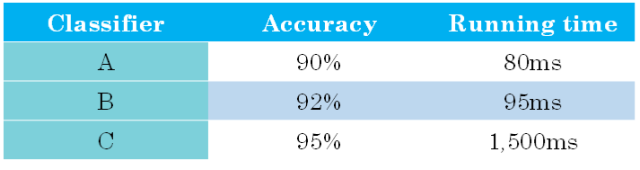

② Accuracy和Running time这两个性能不太合适综合成单值评价指标。

③ 因此，我们可以将Accuracy作为优化指标（Optimizing metic），将Running time作为满意指标（Satisficing metic）。

④ 也就是说，给Running time设定一个阈值，在其满足阈值的情况下，选择Accuracy最大的模型。

⑤ 如果设定Running time必须在100ms以内，那么很明显，模型C不满足阈值条件，首先剔除；模型B相比较模型A而言，Accuracy更高，性能更好。

⑥ 概括来说，性能指标（Optimizing metic）是需要优化的，越优越好；而满意指标（Satisficing metic）只要满足设定的阈值就好了。

# 5.训练/验证/测试分布

① Train/dev/test sets如何设置对机器学习的模型训练非常重要，合理设置能够大大提高模型训练效率和模型质量。

② 原则上应该尽量保证dev sets和test sets来源于同一分布且都反映了实际样本的情况。

③ 如果dev sets和test sets不来自同一分布，那么我们从dev sets上选择的“最佳”模型往往不能够在test sets上表现得很好。

④ 这就好比我们在dev sets上找到最接近一个靶的靶心的箭，但是我们test sets提供的靶心却远远偏离dev sets上的靶心，结果这支肯定无法射中test sets上的靶心位置。

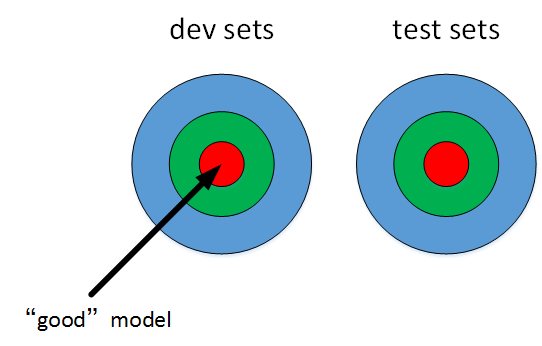

① 在之前的课程中我们已经介绍过，当样本数量不多（小于一万）的时候，通常将Train/dev/test sets的比例设为60%/20%/20%，在没有dev sets的情况下，Train/test sets的比例设为70%/30%。

② 当样本数量很大（百万级别）的时候，通常将相应的比例设为98%/1%/1%或者99%/1%。

① 对于dev sets数量的设置，应该遵循的准则是通过dev sets能够检测不同算法或模型的区别，以便选择出更好的模型。

② 对于test sets数量的设置，应该遵循的准则是通过test sets能够反映出模型在实际中的表现。

③ 实际应用中，可能只有train/dev sets，而没有test sets。这种情况也是允许的，只要算法模型没有对dev sets过拟合。但是，条件允许的话，最好是有test sets，实现无偏估计。

① 算法模型的评价标准有时候需要根据实际情况进行动态调整，目的是让算法模型在实际应用中有更好的效果。

② 举个猫类识别的例子。初始的评价标准是错误率，算法A错误率为3%，算法B错误率为5%。

③ 显然，A更好一些。但是，实际使用时发现算法A会通过一些色情图片，但是B没有出现这种情况。

④ 从用户的角度来说，他们可能更倾向选择B模型，虽然B的错误率高一些。

⑤ 这时候，我们就需要改变之前单纯只是使用错误率作为评价标准，而考虑新的情况进行改变。例如增加色情图片的权重，增加其代价。

① 原来的cost function：

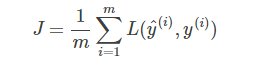

② 更改评价标准后的cost function：

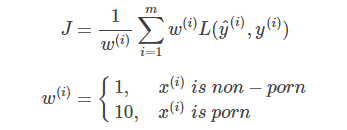

③ 概括来说，机器学习可分为两个过程：

 - Define a metric to evaluate classifiers

 - How to do well on this metric
 
④ 也就是说，第一步是找靶心，第二步是通过训练，射中靶心。但是在训练的过程中可能会根据实际情况改变算法模型的评价标准，进行动态调整。

⑤ 另外一个需要动态改变评价标准的情况是dev/test sets与实际使用的样本分布不一致。比如猫类识别样本图像分辨率差异。

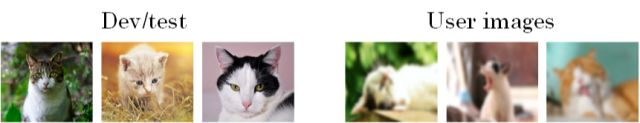

# 6. 人类水平表现

① 机器学习模型的表现通常会跟人类水平表现作比较，如下图所示：

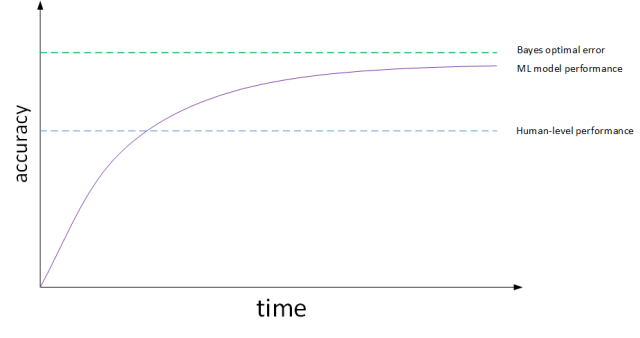

② 图中，横坐标是训练时间，纵坐标是准确性。机器学习模型经过训练会不断接近human-level performance甚至超过它。

③ 但是，超过human-level performance之后，准确性会上升得比较缓慢，最终不断接近理想的最优情况，我们称之为bayes optimal error。

④ 理论上任何模型都不能超过它，bayes optimal error代表了最佳表现。

① 实际上，human-level performance在某些方面有不俗的表现。例如图像识别、语音识别等领域，人类是很擅长的。

② 所以，让机器学习模型性能不断接近human-level performance非常必要也做出很多努力：

 - Get labeled data from humans.

 - Gain insight from manual error analysis: Why did a person get this right?

 - Better analysis of bias/variance.

① 实际应用中，要看human-level error，training error和dev error的相对值。

② 例如猫类识别的例子中，如果human-level error为1%，training error为8%，dev error为10%。

③ 由于training error与human-level error相差7%，dev error与training error只相差2%，所以目标是尽量在训练过程中减小training error，即减小偏差bias。

④ 如果图片很模糊，肉眼也看不太清，human-level error提高到7.5%。

⑤ 这时，由于training error与human-level error只相差0.5%，dev error与training error只相差2%，所以目标是尽量在训练过程中减小dev error，即方差variance。这是相对而言的。

① 对于物体识别这类CV问题，human-level error是很低的，很接近理想情况下的bayes optimal error。

② 因此，上面例子中的1%和7.5%都可以近似看成是两种情况下对应的bayes optimal error。

③ 实际应用中，我们一般会用human-level error代表bayes optimal error。

① 通常，我们把training error与human-level error之间的差值称为偏差（bias），也称作avoidable bias；把dev error与training error之间的差值称为方差（variance）。

② 根据bias和variance值的相对大小，可以知道算法模型是否发生了欠拟合或者过拟合。

① 我们说过human-level performance能够代表bayes optimal error。但是，human-level performance如何定义呢？举个医学图像识别的例子，不同人群的error有所不同：

 - Typical human : 3% error

 - Typical doctor : 1% error

 - Experienced doctor : 0.7% error

 - Team of experienced doctors : 0.5% error
 
② 不同人群他们的错误率不同。一般来说，我们将表现最好的那一组，即Team of experienced doctors作为human-level performance。

③ 那么，这个例子中，human-level error就为0.5%。

④ 但是实际应用中，不同人可能选择的human-level performance基准是不同的，这会带来一些影响。

① 假如该模型training error为0.7%，dev error为0.8。

② 如果选择Team of experienced doctors，即human-level error为0.5%，则bias比variance更加突出。

③ 如果选择Experienced doctor，即human-level error为0.7%，则variance更加突出。

④ 也就是说，选择什么样的human-level error，有时候会影响bias和variance值的相对变化。

⑤ 当然这种情况一般只会在模型表现很好，接近bayes optimal error的时候出现。

⑥ 越接近bayes optimal error，模型越难继续优化，因为这时候的human-level performance可能是比较模糊难以准确定义的。

① 对于自然感知类问题，例如视觉、听觉等，机器学习的表现不及人类。但是在很多其它方面，机器学习模型的表现已经超过人类了，包括：

 - Online advertising

 - Product recommendations

 - Logistics(predicting transit time)

 - Loan approvals
 
② 实际上，机器学习模型超过human-level performance是比较困难的。

③ 但是只要提供足够多的样本数据，训练复杂的神经网络，模型预测准确性会大大提高，很有可能接近甚至超过human-level performance。

④ 值得一提的是当算法模型的表现超过human-level performance时，很难再通过人的直觉来解决如何继续提高算法模型性能的问题。

⑤ 实际上，机器学习模型超过human-level performance是比较困难的。但是只要提供足够多的样本数据，训练复杂的神经网络，模型预测准确性会大大提高，很有可能接近甚至超过human-level performance。

# 7. 提高模型性能

① 提高机器学习模型性能主要要解决两个问题：avoidable bias和variance。

② 我们之前介绍过，training error与human-level error之间的差值反映的是avoidable bias，dev error与training error之间的差值反映的是variance。

① 解决avoidable bias的常用方法包括：

 - Train bigger model

 - Train longer/better optimization algorithms: momentum, RMSprop, Adam

 - NN architecture/hyperparameters search
 
② 解决variance的常用方法包括：

 - More data

 - Regularization: L2, dropout, data augmentation

 - NN architecture/hyperparameters search